In [ ]:
# -------------------- PHASE 1 (DATA CLEANING & FEATURE ENGINEERING) ------------------------------------

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [18]:
# Load dataset
df = pd.read_csv("kiranaRO_train.csv")

In [19]:
df.shape

(141889, 8)

In [20]:
# Step 1: Remove negative or zero quantities (returns or errors)
df = df[df['Quantity'] > 0]

In [30]:
# Step 2: Drop rows with missing product descriptions
df = df.dropna(subset=['Description'])
df = df.drop(columns=['CustomerID'])

In [38]:
# DRop duplicates
df = df.drop_duplicates()

In [39]:
#  Step 3: Convert InvoiceDate to datetime format
df['InvoiceDate'] = dd.to_datetime(df['InvoiceDate'])

In [40]:
#  Step 4: Feature Engineering
df['Date'] = df['InvoiceDate'].dt.date
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour
df['IsWeekend'] = df['InvoiceDate'].dt.dayofweek >= 5
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [63]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,DayOfWeek,Month,Hour,IsWeekend,Revenue
0,573745,22138,259,6,2011-11-01 08:53:00,4.95,United Kingdom,2011-11-01,4,11,8,False,29.7
1,562670,22791,3263,12,2011-08-08 13:42:00,1.25,EIRE,2011-08-08,1,8,13,False,15.0
2,541604,51014L,1126,24,2011-01-19 17:23:00,0.85,United Kingdom,2011-01-19,5,1,17,False,20.4
3,551855,22622,502,2,2011-05-04 15:08:00,11.95,United Kingdom,2011-05-04,5,5,15,False,23.9
4,561474,22384,1860,100,2011-07-27 13:18:00,1.45,United Kingdom,2011-07-27,5,7,13,False,145.0


In [62]:
# Step 5: Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to 'DayOfWeek' and 'Description'
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Description'] = le.fit_transform(df['Description'])

# Check if the encoding has been applied
# print(df[['DayOfWeek', 'Description']].head())
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,DayOfWeek,Month,Hour,IsWeekend,Revenue
0,573745,22138,259,6,2011-11-01 08:53:00,4.95,United Kingdom,2011-11-01,4,11,8,False,29.7
1,562670,22791,3263,12,2011-08-08 13:42:00,1.25,EIRE,2011-08-08,1,8,13,False,15.0
2,541604,51014L,1126,24,2011-01-19 17:23:00,0.85,United Kingdom,2011-01-19,5,1,17,False,20.4
3,551855,22622,502,2,2011-05-04 15:08:00,11.95,United Kingdom,2011-05-04,5,5,15,False,23.9
4,561474,22384,1860,100,2011-07-27 13:18:00,1.45,United Kingdom,2011-07-27,5,7,13,False,145.0


In [65]:
# Step 6: Z score
from scipy.stats import zscore

# Apply Z-score to the 'Quantity' column
df['Quantity_zscore'] = zscore(df['Quantity'])

# Filter out rows where the Z-score is greater than 3 (for outliers)
df_cleaned = df[df['Quantity_zscore'].abs() <= 3]

# Check the shape of the cleaned data
print(df_cleaned.shape)


(137589, 14)


In [66]:
# Step 7: Save cleaned data for later use
df.to_csv("cleaned_kirana_data.csv", index=False)

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,DayOfWeek,Month,Hour,IsWeekend,Revenue,Quantity_zscore
0,573745,22138,259,6,2011-11-01 08:53:00,4.95,United Kingdom,2011-11-01,4,11,8,False,29.7,-0.110251
1,562670,22791,3263,12,2011-08-08 13:42:00,1.25,EIRE,2011-08-08,1,8,13,False,15.0,0.043164
2,541604,51014L,1126,24,2011-01-19 17:23:00,0.85,United Kingdom,2011-01-19,5,1,17,False,20.4,0.349993
3,551855,22622,502,2,2011-05-04 15:08:00,11.95,United Kingdom,2011-05-04,5,5,15,False,23.9,-0.212528
4,561474,22384,1860,100,2011-07-27 13:18:00,1.45,United Kingdom,2011-07-27,5,7,13,False,145.0,2.293245


In [68]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0
Date,0
DayOfWeek,0
Month,0


In [69]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# from google.colab import files
# files.download("cleaned_kirana_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# -------------------- PHASE 2 (EXPLORATORY DATA ANALYSIS) ------------------------------------

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Optional: Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [72]:
# Load cleaned dataset
df = pd.read_csv("cleaned_kirana_data.csv", parse_dates=['InvoiceDate'])

In [73]:
# 1. Total Product Demand Over Time
daily_demand = df.groupby('Date')['Quantity'].sum()

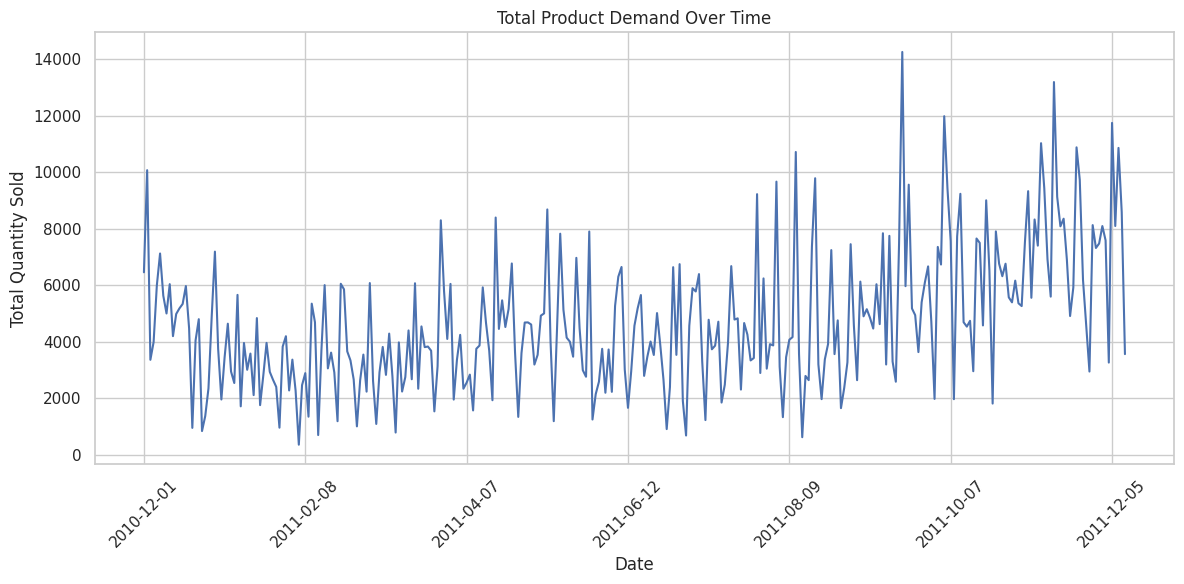

In [76]:
plt.figure()
daily_demand.plot()
plt.title("Total Product Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

<ipython-input-77-8ecdebf9be83>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


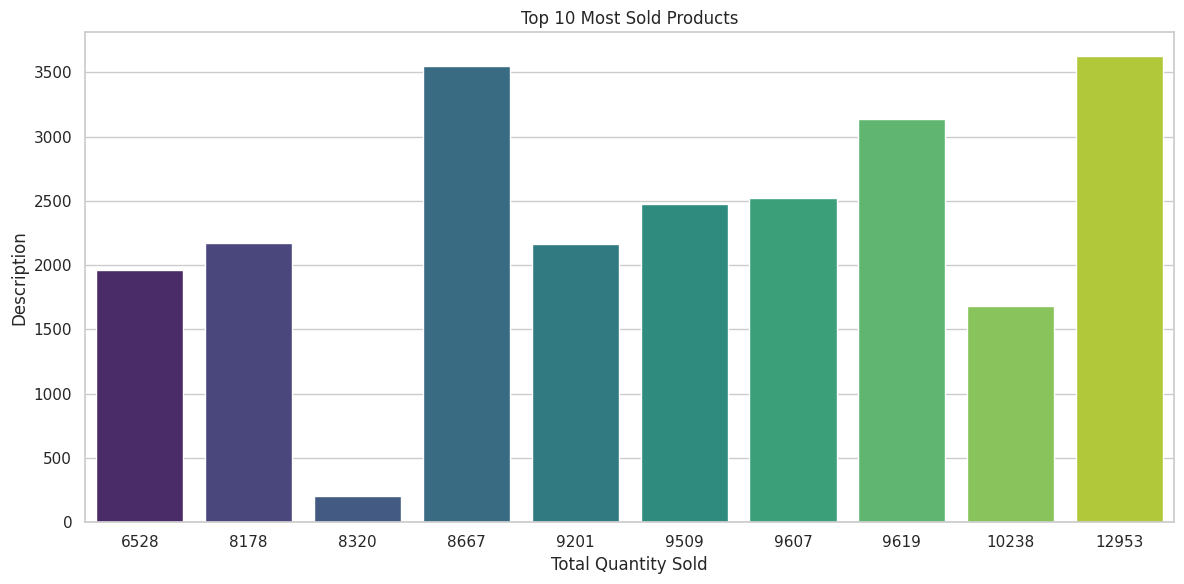

In [77]:
# 2. Top 10 Most Sold Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Total Quantity Sold")
plt.tight_layout()
plt.show()

<ipython-input-78-7a899edfd91d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue.values, y=top_revenue.index, palette="rocket")


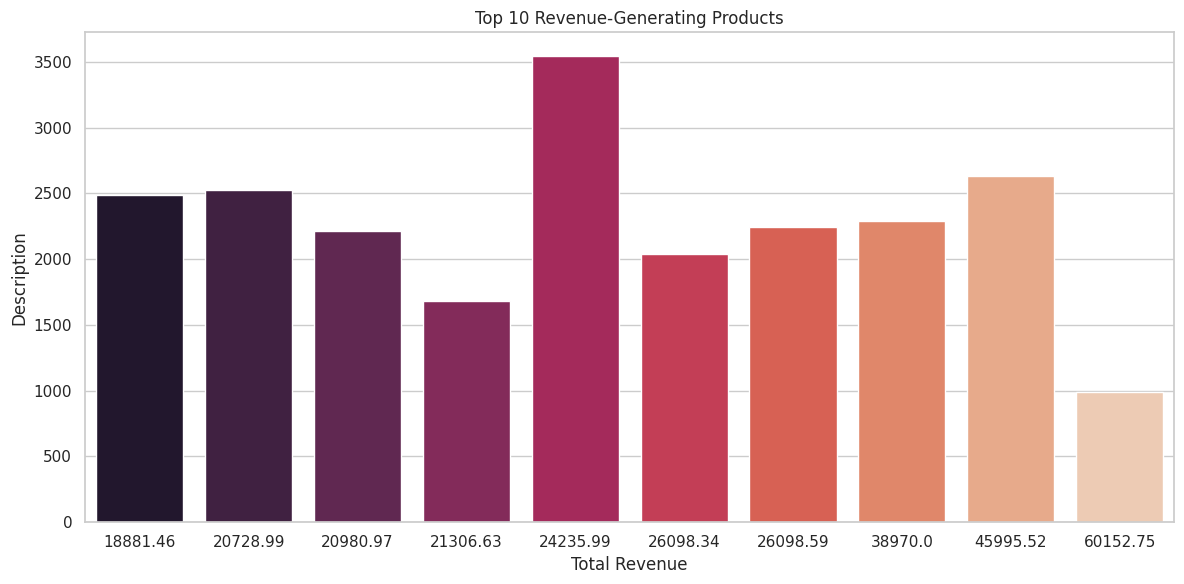

In [78]:
# 3. Top 10 Revenue Generating Products
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=top_revenue.values, y=top_revenue.index, palette="rocket")
plt.title("Top 10 Revenue-Generating Products")
plt.xlabel("Total Revenue")
plt.tight_layout()
plt.show()


<ipython-input-82-dbc93ef8525d>:10: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


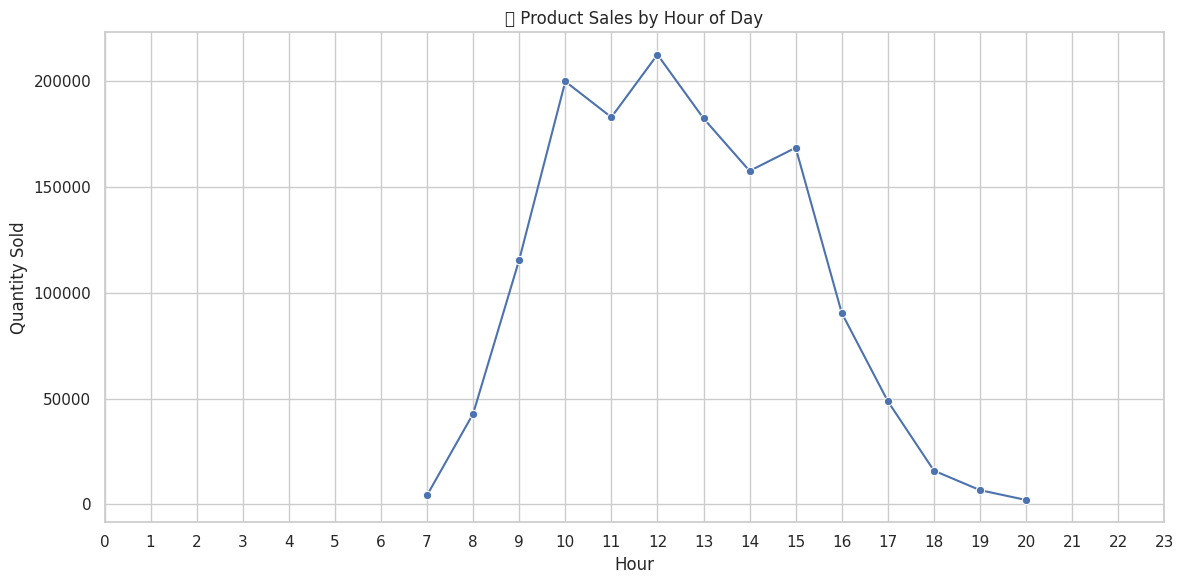

In [82]:
# 4. Sales by Hour of the Day
hourwise_sales = df.groupby('Hour')['Quantity'].sum()

plt.figure()
sns.lineplot(x=hourwise_sales.index, y=hourwise_sales.values, marker='o')
plt.title("⏰ Product Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Quantity Sold")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# -------------------- PHASE 3 (MODELING) ------------------------------------

In [83]:
# ------------------ XGBoost Model Training --------------------------------------
# XGBoost Regressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Train model
xgb_model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate (Regression)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("\nXGBoost Evaluation:")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"MAE: {xgb_mae:.2f}")
print(f"R²: {xgb_r2:.2f}")

# Evaluate (Classification based on demand threshold)
threshold = 100
xgb_pred_class = (xgb_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

xgb_accuracy = accuracy_score(y_test_class, xgb_pred_class)
xgb_precision = precision_score(y_test_class, xgb_pred_class)
xgb_recall = recall_score(y_test_class, xgb_pred_class)
xgb_f1 = f1_score(y_test_class, xgb_pred_class)

print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_recall:.2f}")
print(f"F1 Score: {xgb_f1:.2f}")



XGBoost Evaluation:
RMSE: 44.78
MAE: 14.55
R²: -0.16
Accuracy: 0.98
Precision: 0.03
Recall: 0.00
F1 Score: 0.01


In [84]:
# -------------------------- RANDOM FOREST REGRESSOR ----------------------------------------

In [85]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate (Regression)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\nRandomForest Evaluation:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R²: {rf_r2:.2f}")

# Evaluate (Classification based on demand threshold)
rf_pred_class = (rf_pred > threshold).astype(int)

rf_accuracy = accuracy_score(y_test_class, rf_pred_class)
rf_precision = precision_score(y_test_class, rf_pred_class)
rf_recall = recall_score(y_test_class, rf_pred_class)
rf_f1 = f1_score(y_test_class, rf_pred_class)

print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")


RandomForest Evaluation:
RMSE: 55.02
MAE: 15.60
R²: -0.75
Accuracy: 0.98
Precision: 0.05
Recall: 0.03
F1 Score: 0.03
